## Objective
Look at mean waveform footprints of spikes only detected by prop

## General setup

In [1]:
%load_ext autoreload

In [2]:
from multiprocessing import Pool

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

%autoreload 2
from src import utils, plot
from src.sorters.base import Unit
from src.sorters.prop_signal import PropSignal
from src.sorters.kilosort import get_experts_kilosort
from src.comparison import Comparison

In [50]:
RECORDING = utils.rec_si()
CHANS_RMS = utils.chans_rms_si()

PROP_SIGNAL = PropSignal("/data/MEAprojects/dandi/000034/sub-mouse412804/prop_signal/230728", RECORDING)

/home/mea/anaconda3/envs/prop/lib/python3.7/site-packages/hdmf/spec/namespace.py:456: UserWarning: ignoring namespace 'hdmf-common' because it already exists
  warn("ignoring namespace '%s' because it already exists" % ns['name'])
/home/mea/anaconda3/envs/prop/lib/python3.7/site-packages/hdmf/spec/namespace.py:456: UserWarning: ignoring namespace 'core' because it already exists
  warn("ignoring namespace '%s' because it already exists" % ns['name'])


Recording does not have scaled traces. Setting gain to 0.195


In [69]:
KILOSORT = get_experts_kilosort()
# KILOSORT = utils.kilosort_first_si()

# from src.sorters.kilosort import Kilosort
# KILOSORT = Kilosort(utils.PATH_SM4_SI, "initial", RECORDING)
# print(len(KILOSORT))

/home/mea/anaconda3/envs/prop/lib/python3.7/site-packages/hdmf/spec/namespace.py:456: UserWarning: ignoring namespace 'hdmf-common' because it already exists
  warn("ignoring namespace '%s' because it already exists" % ns['name'])
/home/mea/anaconda3/envs/prop/lib/python3.7/site-packages/hdmf/spec/namespace.py:456: UserWarning: ignoring namespace 'core' because it already exists
  warn("ignoring namespace '%s' because it already exists" % ns['name'])
/data/MEAprojects/PropSignal/src/comparison.py:331: UserWarning: Using Comparison.count_matching_events_si which may be inaccurate
  warnings.warn("Using Comparison.count_matching_events_si which may be inaccurate", UserWarning)


/data/MEAprojects/PropSignal/src/sorters/kilosort.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  spike_times = np.array([spikes1[idx] for idx in range(len(comp.match12)) if comp.match12[idx] != -1])


Recording does not have scaled traces. Setting gain to 0.195


In [5]:
## Different ways of matching spikes

# def spikeinterface(times1, times2, delta=0.4):
#     # The way spikeinterface does it
#     times_concat = np.concatenate((times1, times2))
#     membership = np.concatenate((np.ones(len(times1)) * 1, np.ones(len(times2)) * 2))
#     indices = times_concat.argsort()
#     times_concat_sorted = times_concat[indices]
#     membership_sorted = membership[indices]
#     # diffs = times_concat_sorted[1:] - times_concat_sorted[:-1]
#     # inds = np.where((diffs <= delta) & (membership_sorted[:-1] != membership_sorted[1:]))[0]
#     diffs = times_concat_sorted[1:] - times_concat_sorted[:-1] - delta
#     inds = np.where((diffs <= 1e-4) & (membership_sorted[:-1] != membership_sorted[1:]))[0]
#     if len(inds) == 0:
#         return 0
#     inds2 = np.where(inds[:-1] + 1 != inds[1:])[0]  # Prevents a spike being matched with more than one other spike
#     return len(inds2) + 1


# def searchsorted(times1, times2, delta=0.4):
#     matched = []
#     unmatched1 = []

#     already_matched = set()
#     for st1 in times1:
#         idx = np.searchsorted(times2, st1)
#         idx_left = idx - 1
#         while idx_left in already_matched:
#             idx_left -= 1
#         if idx_left >= 0:
#             left = times2[idx_left]
#         else:
#             left = -np.inf

#         idx_right = idx
#         while idx_right in already_matched:
#             idx_right += 1
#         if idx_right < len(times2):
#             right = times2[idx_right]
#         else:
#             right = np.inf

#         if right - st1 < st1 - left:
#             if right - st1 - delta <= 1e-4:
#                 matched.append(st1)
#                 already_matched.add(idx_right)
#             else:
#                 unmatched1.append(st1)
#         else:
#             if st1 - left - delta <= 1e-4:
#                 matched.append(st1)
#                 already_matched.add(idx_left)
#             else:
#                 unmatched1.append(st1)

#     unmatched2 = [times2[i] for i in range(len(times2)) if i not in already_matched]

#     return len(matched)


# def merge_count(times1, times2, delta=0.4):
#     count = 0
#     ptr1 = ptr2 = 0
#     while ptr1 < len(times1) and ptr2 < len(times2):
#         diff = abs(times1[ptr1] - times2[ptr2]) - delta
#         if diff <= 1e-4:
#             count += 1
#             ptr1 += 1
#             ptr2 += 1
#         elif times1[ptr1] < times2[ptr2]:
#             ptr1 += 1
#         else:
#             ptr2 += 1
    
#     return count

# prop_train = set()
# for unit in PROP_SIGNAL:
#     prop_train.update(unit.spike_train)
# prop_train = np.sort(np.array(list(prop_train)))
    
# ks_train = set()
# for unit in KILOSORT:
#     ks_train.update(unit.spike_train)
# ks_train = np.sort(np.array(list(ks_train)))

# for counter in (spikeinterface, searchsorted, merge_count):
#     matches = counter(prop_train, ks_train)
#     print(f"-"*50)
    
#     print(f"#spikes across all units:")
#     print(f"Matches: {matches}")
#     print(f"Matches/Prop: {matches/len(prop_train)*100:.1f}% (Prop: {len(prop_train)})")
#     print(f"Matches/Kosort: {matches/len(ks_train)*100:.1f}% (Kilosort: {len(ks_train)})")


"""
Output:
--------------------------------------------------
#spikes across all units:
Matches: 385984
Matches/Prop: 60.2% (Prop: 641129)
Matches/Kosort: 34.0% (Kilosort: 1133809)
--------------------------------------------------
#spikes across all units:
Matches: 476106
Matches/Prop: 74.3% (Prop: 641129)
Matches/Kosort: 42.0% (Kilosort: 1133809)
--------------------------------------------------
#spikes across all units:
Matches: 486665
Matches/Prop: 75.9% (Prop: 641129)
Matches/Kosort: 42.9% (Kilosort: 1133809)
"""

'\nOutput:\n--------------------------------------------------\n#spikes across all units:\nMatches: 385984\nMatches/Prop: 60.2% (Prop: 641129)\nMatches/Kosort: 34.0% (Kilosort: 1133809)\n--------------------------------------------------\n#spikes across all units:\nMatches: 476106\nMatches/Prop: 74.3% (Prop: 641129)\nMatches/Kosort: 42.0% (Kilosort: 1133809)\n--------------------------------------------------\n#spikes across all units:\nMatches: 486665\nMatches/Prop: 75.9% (Prop: 641129)\nMatches/Kosort: 42.9% (Kilosort: 1133809)\n'

In [70]:
# prop_train = set()
# for unit in PROP_SIGNAL:
#     prop_train.update(unit.spike_train)
# prop_train = np.sort(np.array(list(prop_train)))
    
# ks_train = set()
# for unit in KILOSORT:
#     ks_train.update(unit.spike_train)
# ks_train = np.sort(np.array(list(ks_train)))

# matched_spikes, unmatched_prop, unmatched_ks = Comparison.get_matching_events(prop_train, ks_train, delta=0.4)
# print(f"#spikes across all units:")
# print(f"Matches: {len(matched_spikes)}")
# print(f"Matches/Prop: {len(matched_spikes)/len(prop_train)*100:.1f}% (Prop: {len(prop_train)})")
# print(f"Matches/Kosort: {len(matched_spikes)/len(ks_train)*100:.1f}% (Kilosort: {len(ks_train)})")

# If ks spike not removed from ks_spikes after assigned to a prop spike, i.e. more than one spike from different prop units assigned to one ks unit
ks_spikes = set()
for unit in KILOSORT:
    ks_spikes.update(unit.spike_train)
ks_spikes = np.sort(list(ks_spikes))

total_matching = 0
unmatched_prop = set()
for unit in tqdm(PROP_SIGNAL):
    matching_spikes, unmatched_prop_unit, unmatched_ks = Comparison.get_matching_events(unit.spike_train, ks_spikes)
    total_matching += len(matching_spikes)
    unmatched_prop.update(unmatched_prop_unit)
unmatched_prop = np.array(list(unmatched_prop))
print(total_matching/sum(len(unit.spike_train) for unit in PROP_SIGNAL) * 100)
print(len(unmatched_prop)/sum(len(unit.spike_train) for unit in PROP_SIGNAL) * 100)

  1%|          | 1/89 [00:00<01:11,  1.24it/s]

100%|██████████| 89/89 [01:03<00:00,  1.39it/s]

98.02160865818391
1.9452699242194234


In [71]:
prop_elec_spikes = {}

st_to_elec = {}
for unit in PROP_SIGNAL:
    for st in unit.spike_train:
        st_to_elec[st] = unit.chan 
    
for spike in unmatched_prop:
    elec = st_to_elec[spike]
    if elec not in prop_elec_spikes:
        prop_elec_spikes[elec] = [spike]
    else:
        prop_elec_spikes[elec].append(spike)
    
elec_to_prop = {unit.chan: unit for unit in PROP_SIGNAL}

In [72]:
# Get kilosort units' max channels
NUM_WFS = 300
MS_BEFORE = 2
MS_AFTER = 2

np.random.seed(231)
##
ks_units = [unit for unit in KILOSORT]

def extract_templates(unit_idx):
    unit = ks_units[unit_idx]
    return unit_idx, unit.get_templates(num_wfs=NUM_WFS, ms_before=MS_BEFORE, ms_after=MS_AFTER)

with Pool(processes=12) as pool:
    for unit_idx, templates in tqdm(pool.imap(extract_templates, range(len(ks_units))), total=len(ks_units)):
        ks_units[unit_idx].chan = np.argmin(np.min(templates, axis=1))
        
ks_elec_spikes = {}
st_to_elec = {}
for unit in ks_units:
    for st in unit.spike_train:
        st_to_elec[st] = unit.chan
for spike in unmatched_ks:
    elec = st_to_elec[spike]
    if elec not in ks_elec_spikes:
        ks_elec_spikes[elec] = [spike]
    else:
        ks_elec_spikes[elec].append(spike)
    
elec_to_ks = {}
for unit in ks_units:
    if unit.chan not in elec_to_ks:
        elec_to_ks[unit.chan] = [unit]
    else:
        elec_to_ks[unit.chan].append(unit)

100%|██████████| 226/226 [01:26<00:00,  2.62it/s]


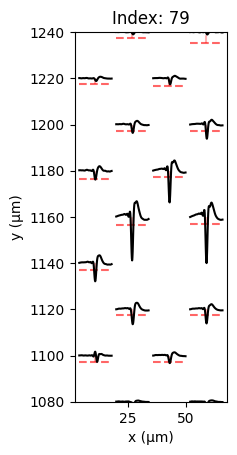

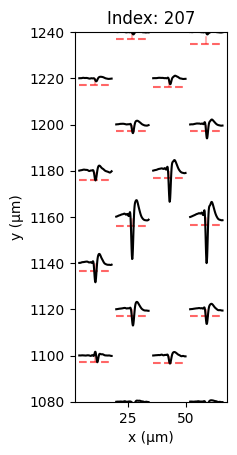

In [35]:
unit1 = KILOSORT[79]
unit1.chan = ks_units[79].chan
unit1.plot(chans_rms=CHANS_RMS)
plt.show()

unit2 = KILOSORT[207]
unit2.chan = ks_units[207].chan
unit2.plot(chans_rms=CHANS_RMS)
plt.show()

In [37]:
np.intersect1d(unit2.spike_train, unit1.spike_train).size

555

In [45]:
matches, _, _ = Comparison.get_matching_events(unit1.spike_train, unit2.spike_train)
print(len(matches))
print(len(unit1.spike_train))
print(len(unit2.spike_train))

1540
1553
2478


--------------------------------------------------


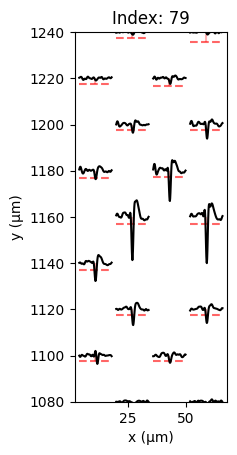

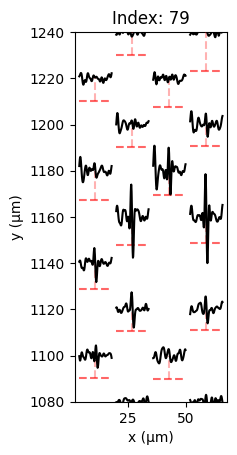

--------------------------------------------------


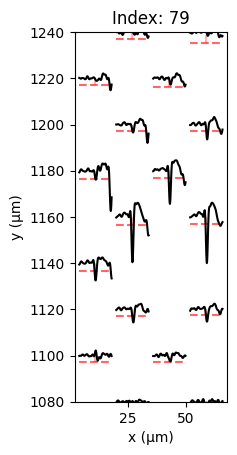

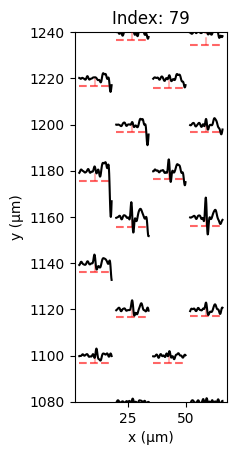

--------------------------------------------------


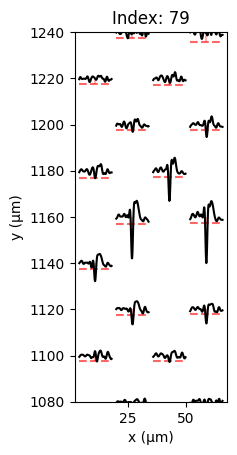

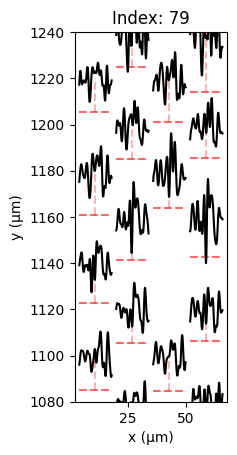

--------------------------------------------------


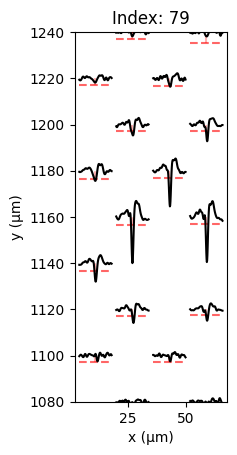

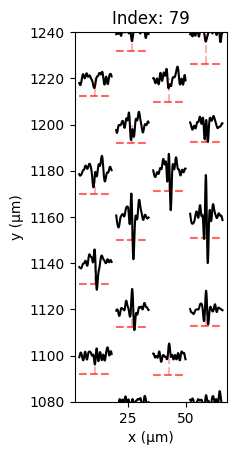

--------------------------------------------------


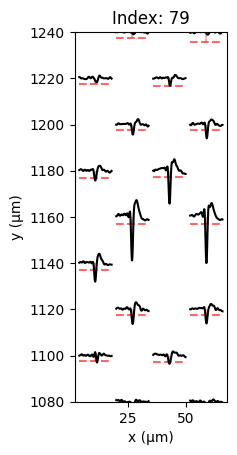

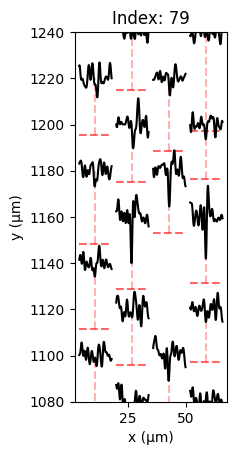

--------------------------------------------------


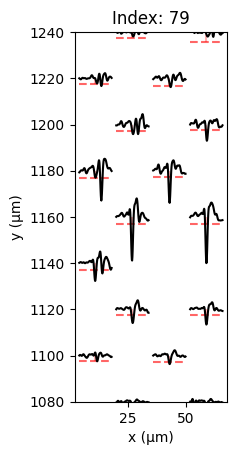

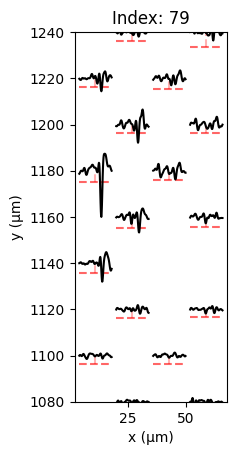

--------------------------------------------------


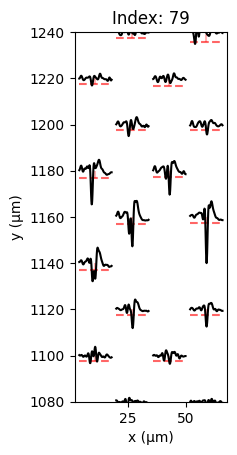

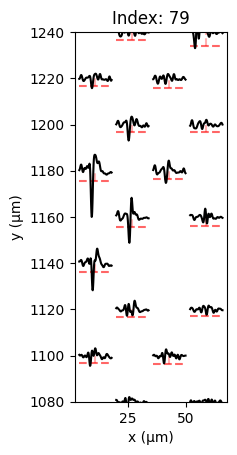

--------------------------------------------------


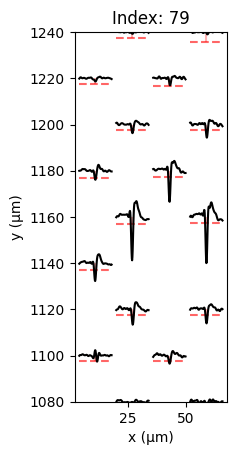

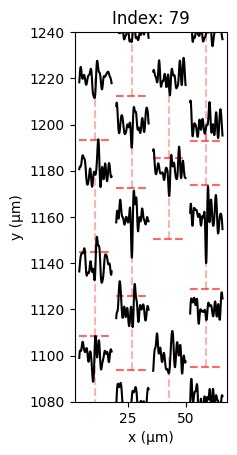

--------------------------------------------------


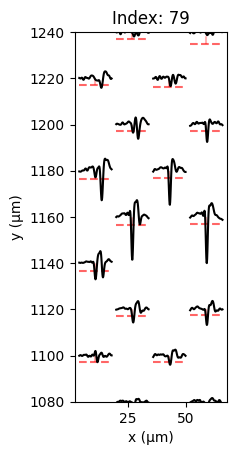

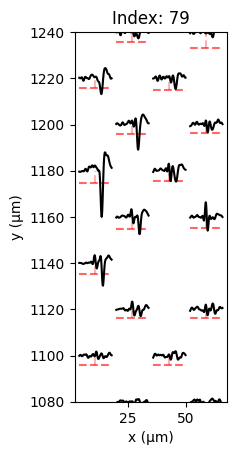

--------------------------------------------------


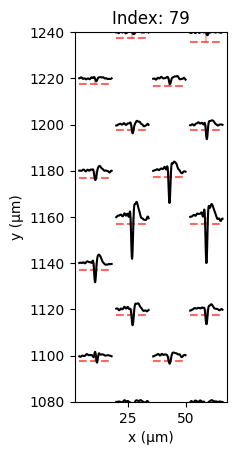

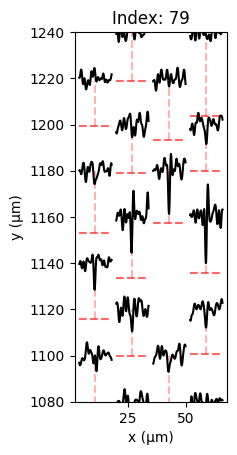

In [48]:
np.random.seed(231)

for st in np.random.choice(matches, 10, replace=False):
    print("-"*50)
    idx = np.flatnonzero(unit1.spike_train == st)[0]
    wfs = unit1.get_waveforms(idx)
    unit1.plot(wf=wfs, chans_rms=CHANS_RMS)
    plt.show()
    
    unit1.plot(wf=wfs-unit1.get_templates(), chans_rms=CHANS_RMS)
    plt.show()

## Plot footprints

### Only prop

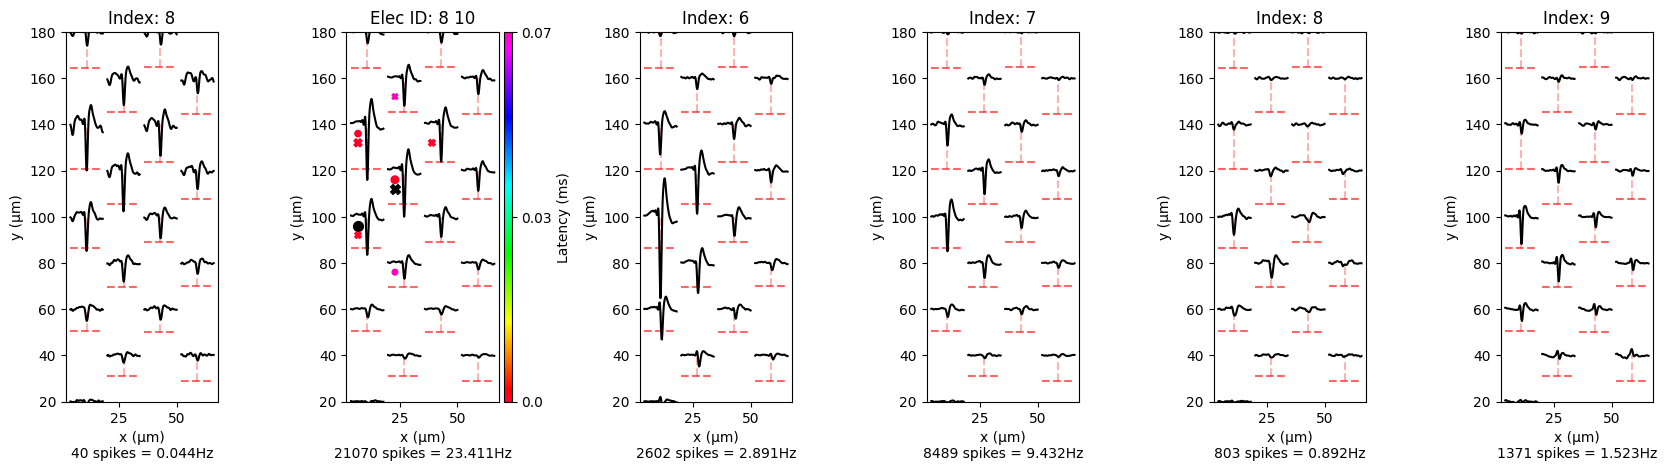

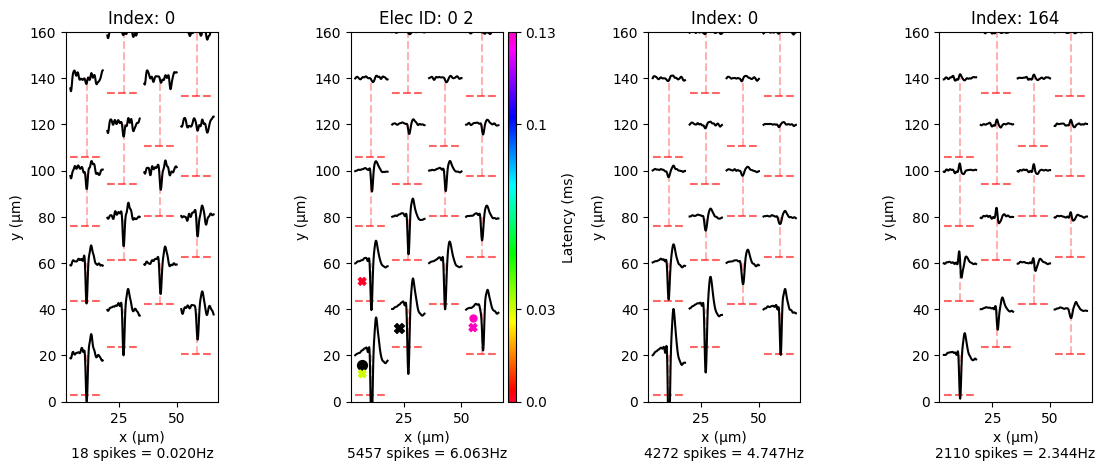

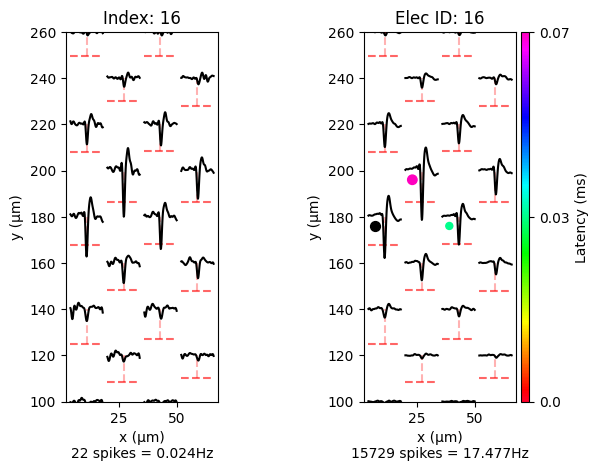

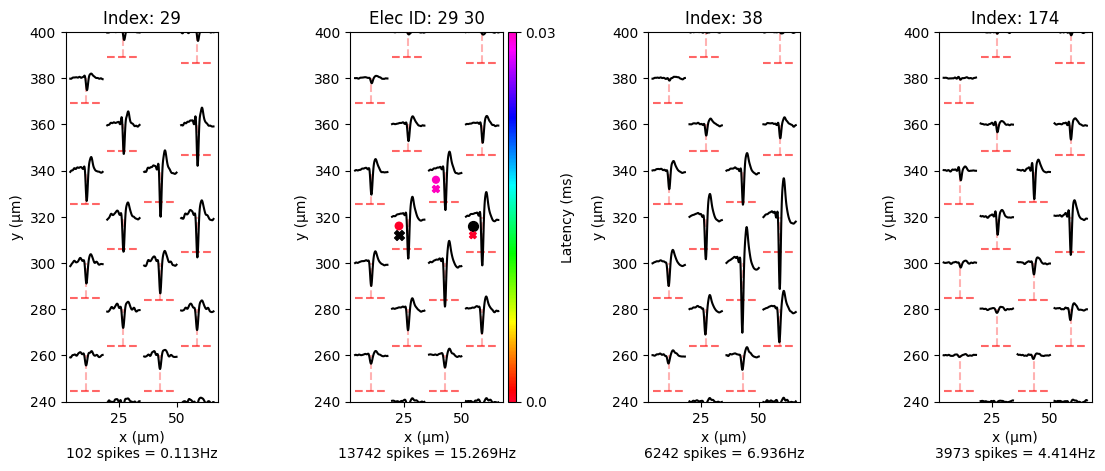

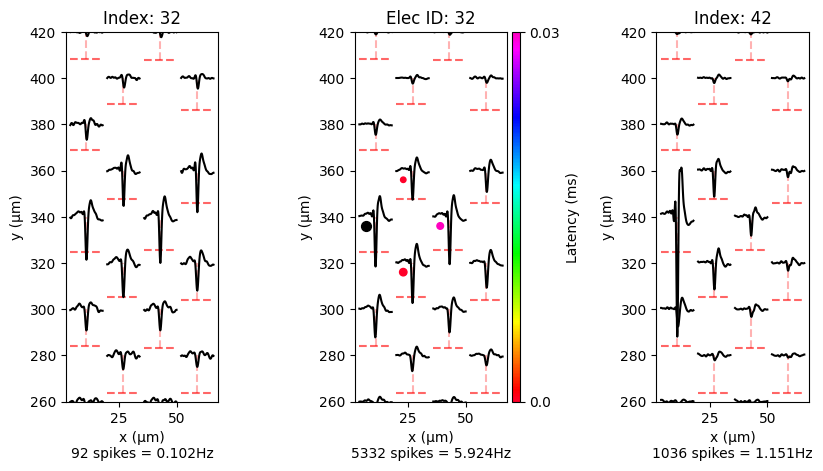

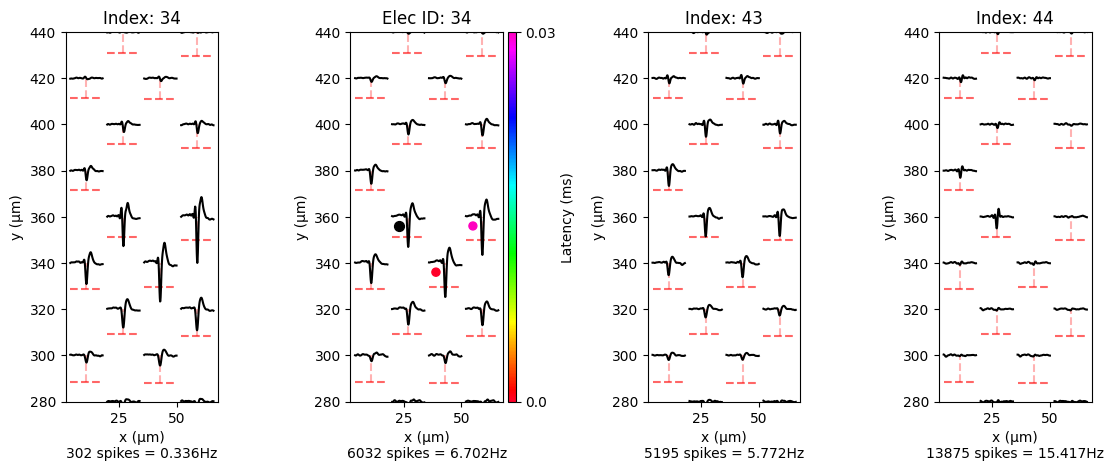

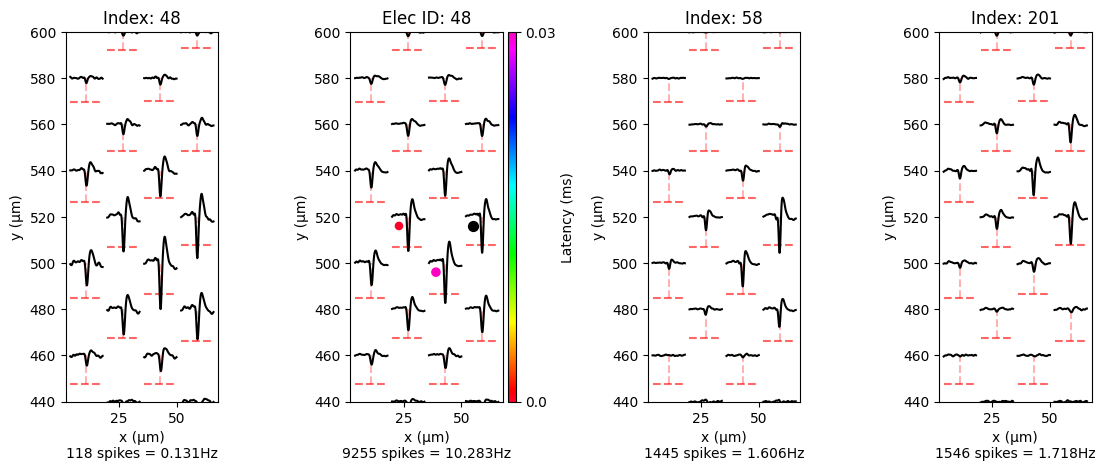

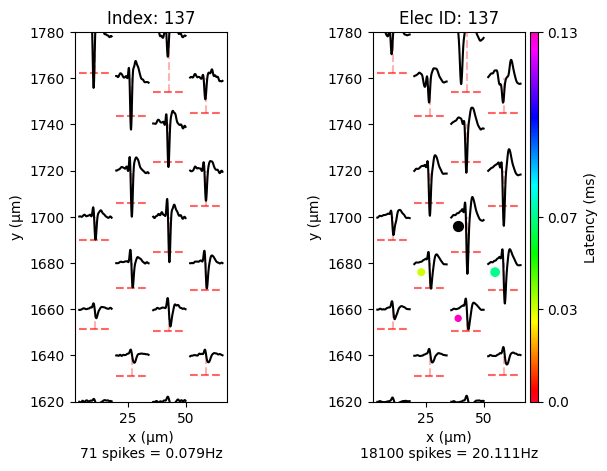

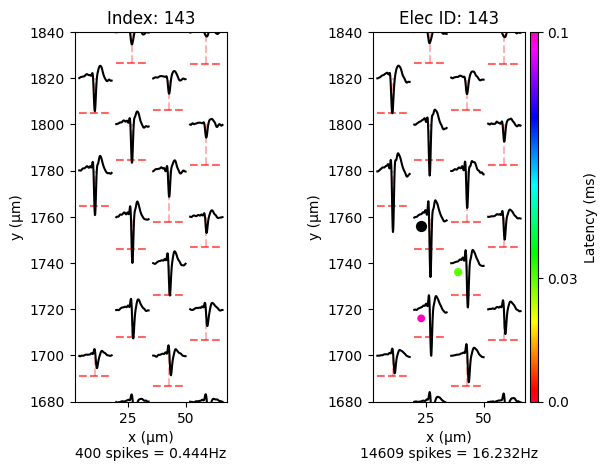

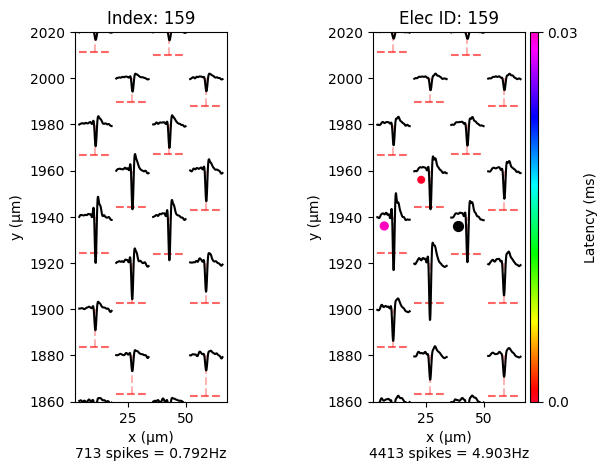

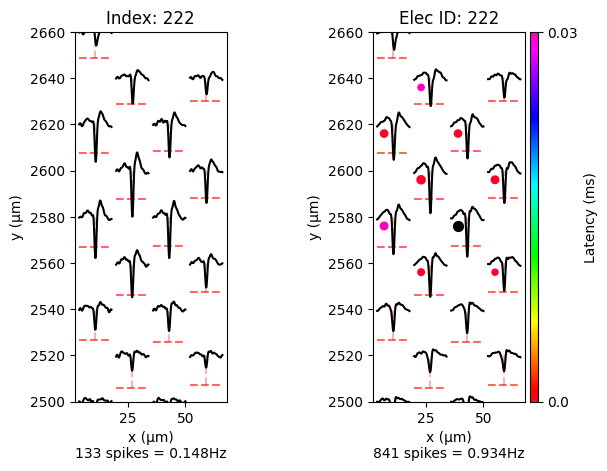

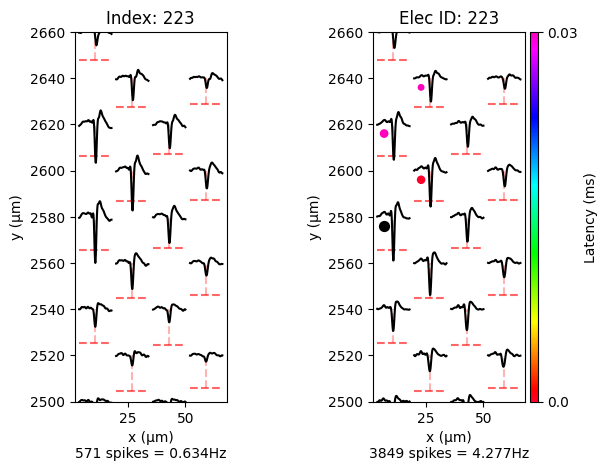

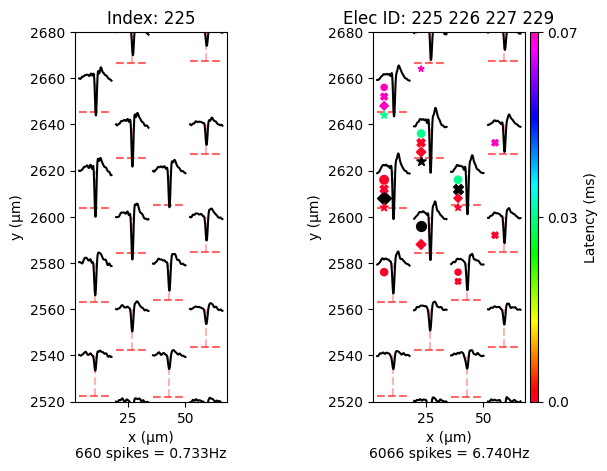

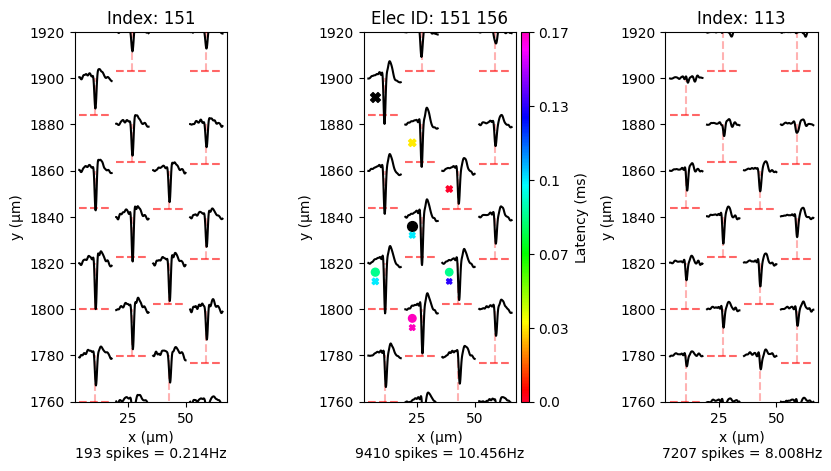

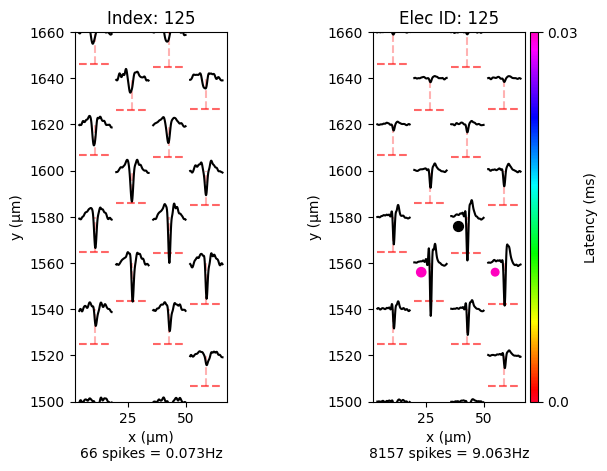

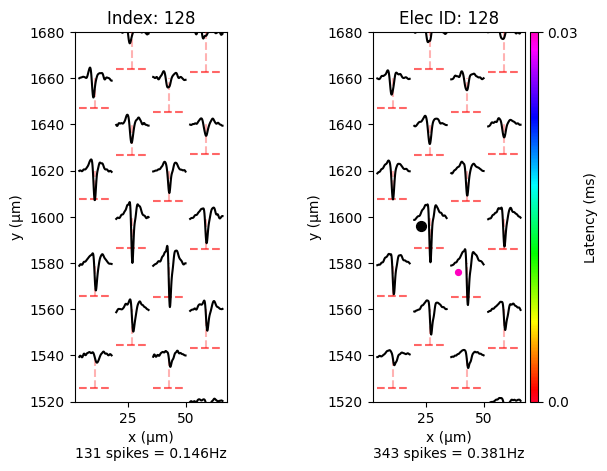

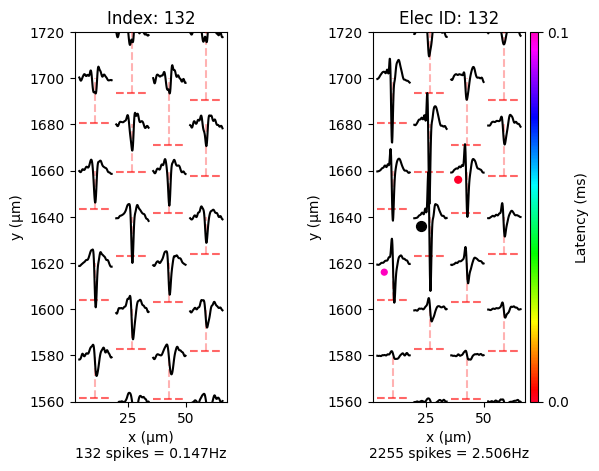

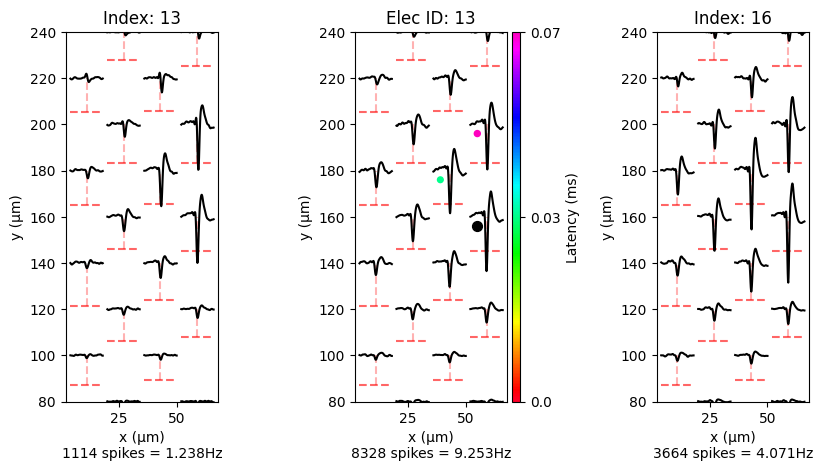

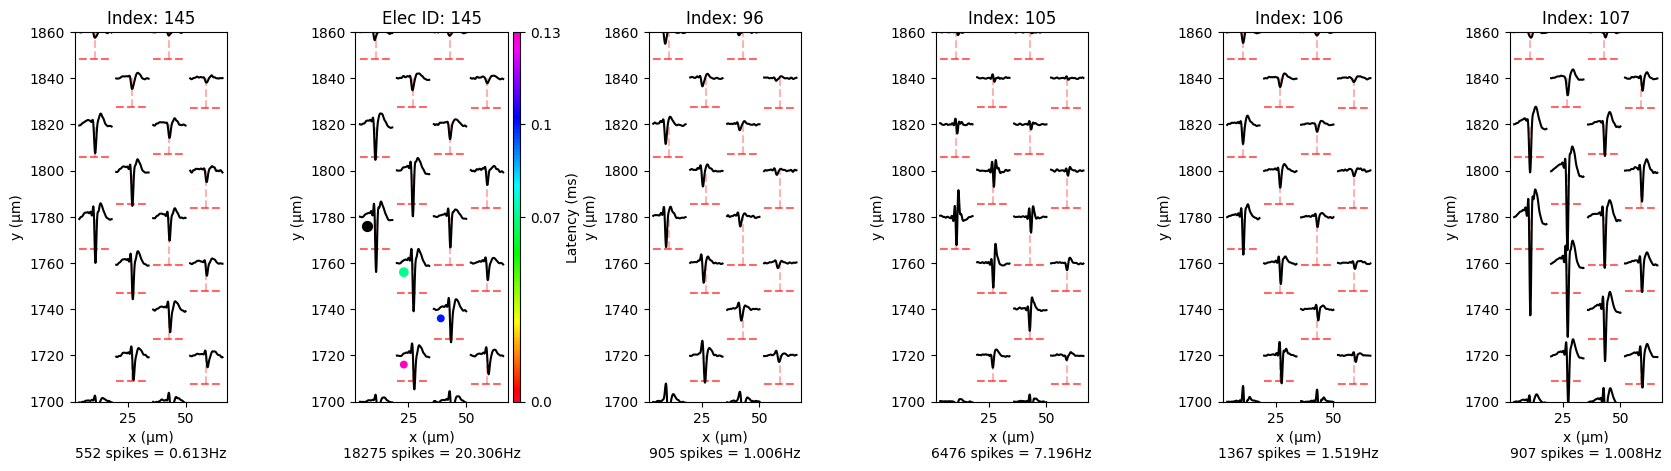

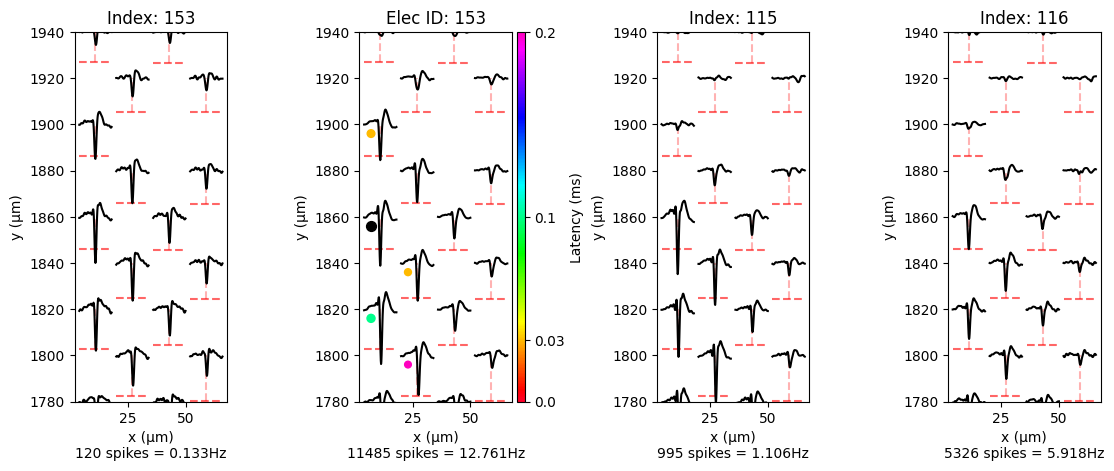

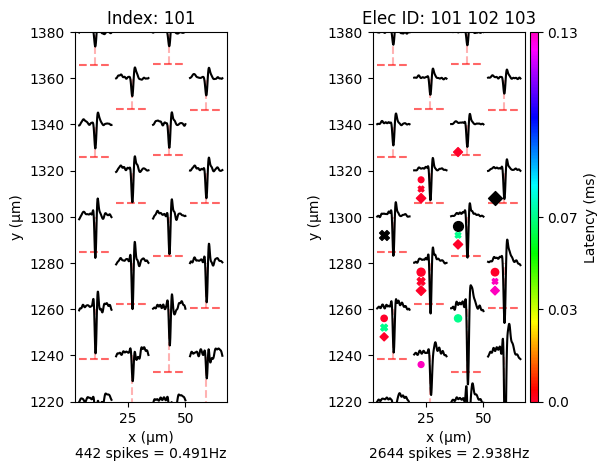

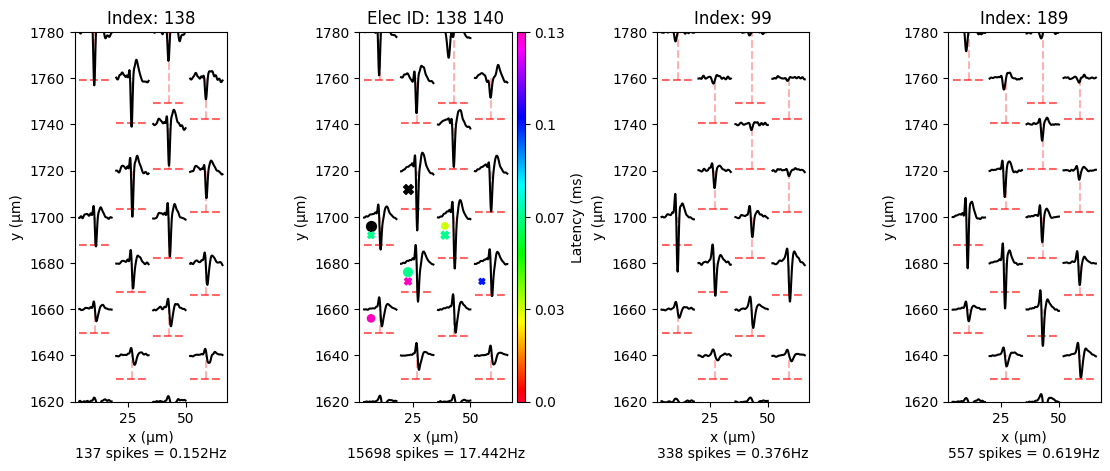

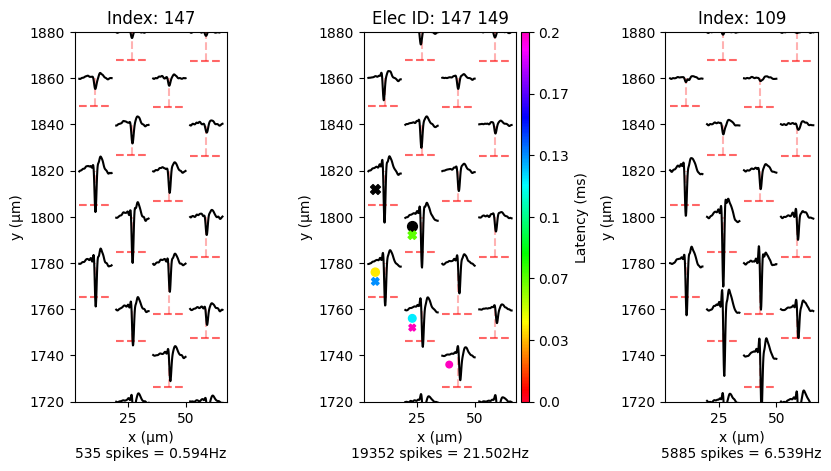

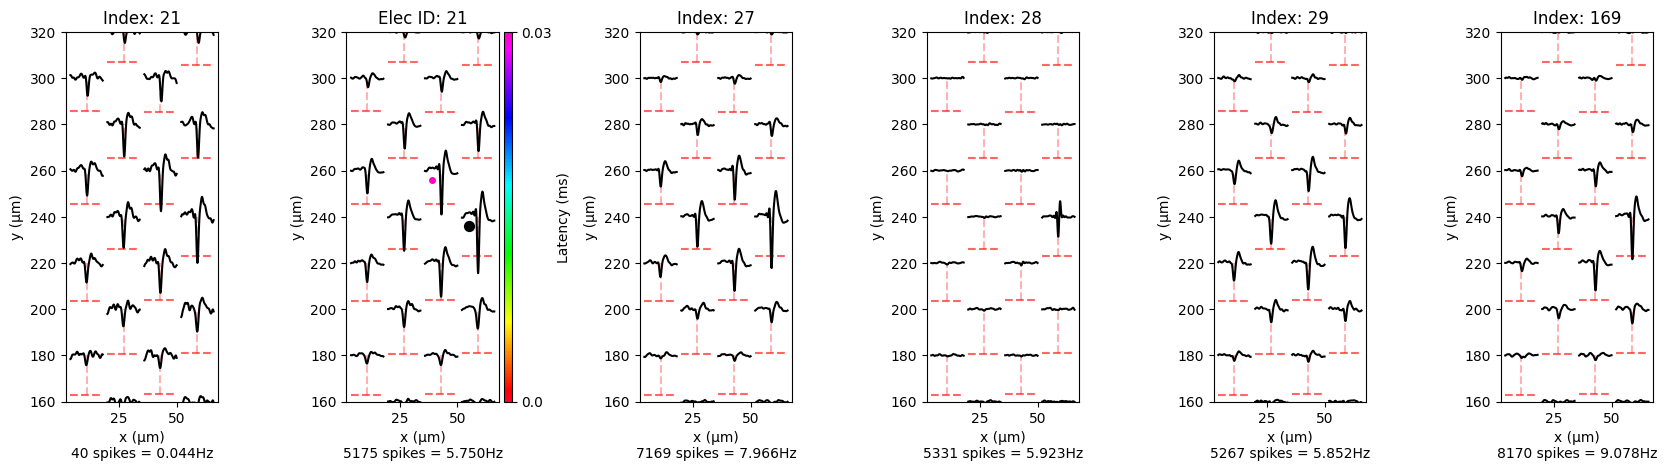

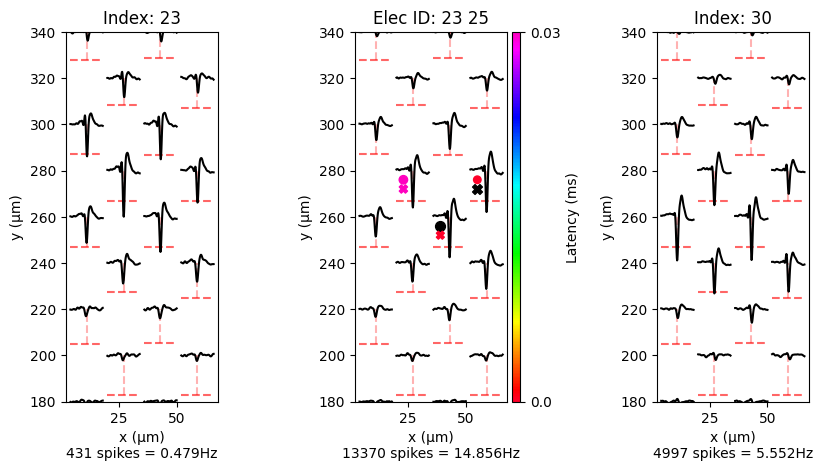

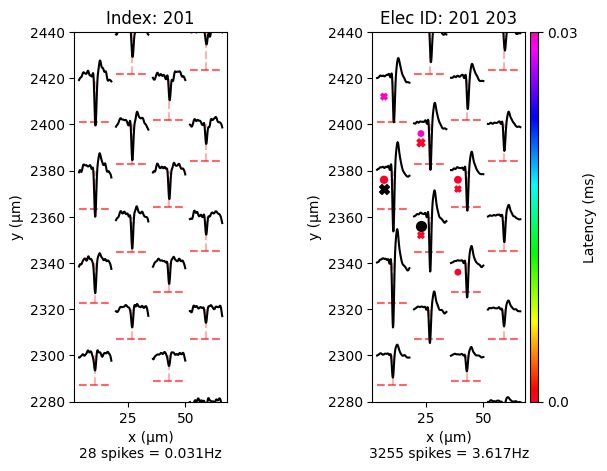

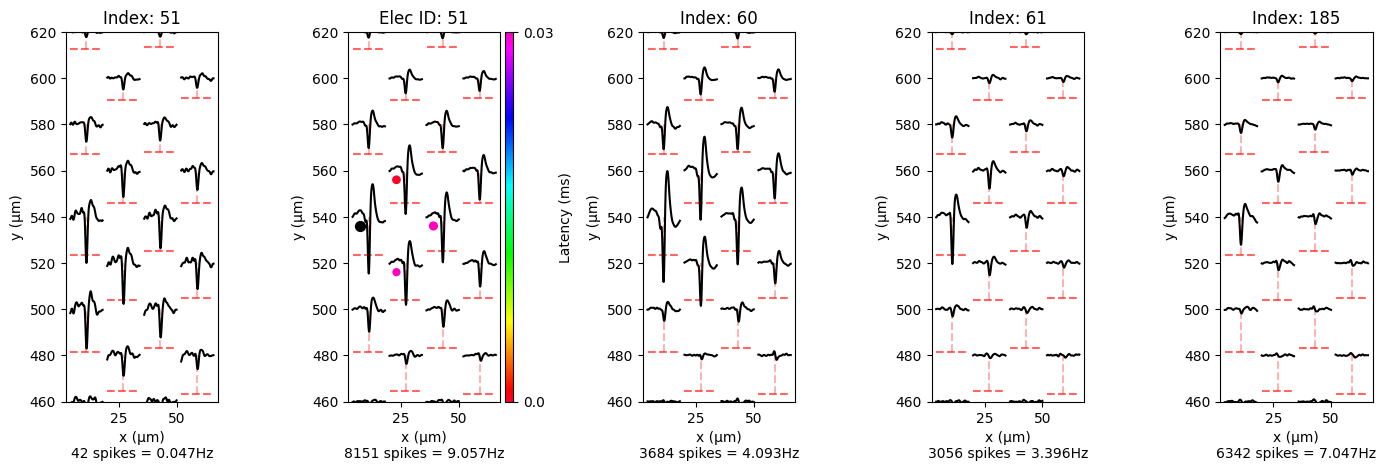

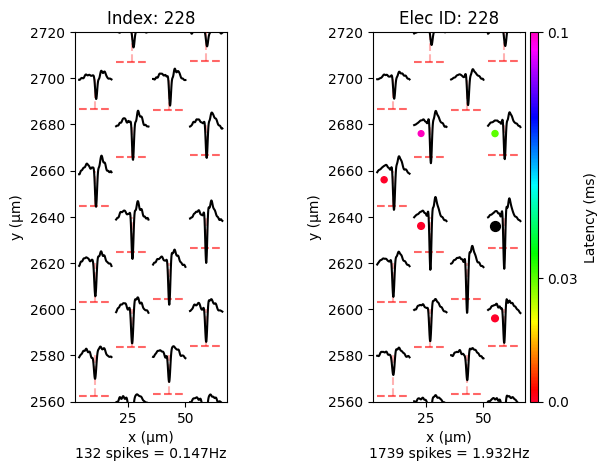

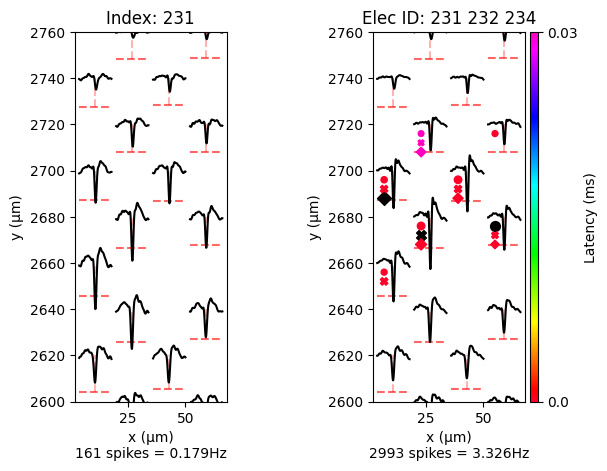

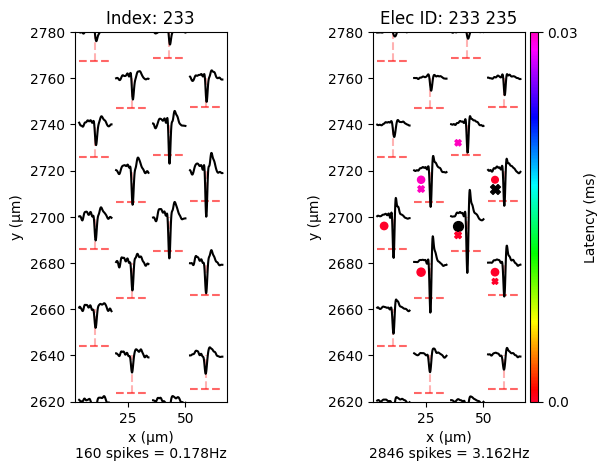

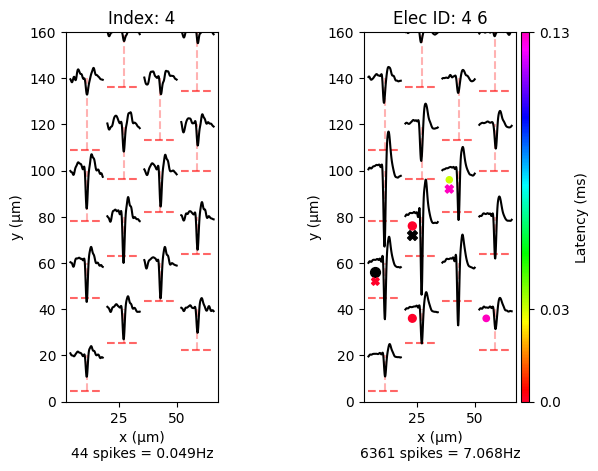

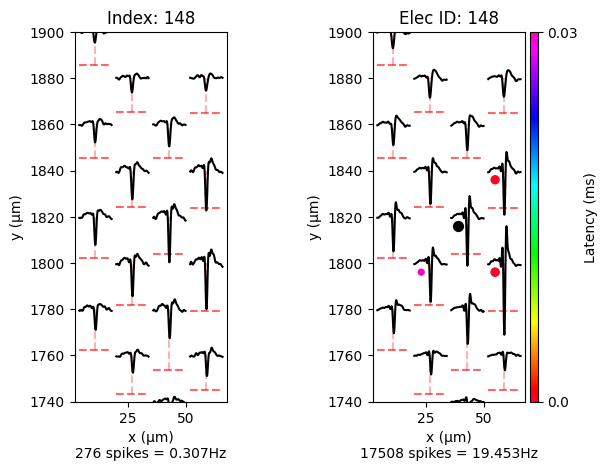

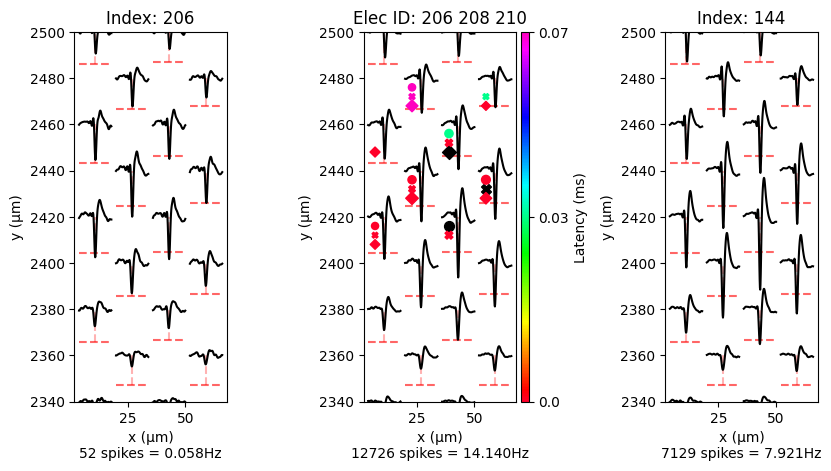

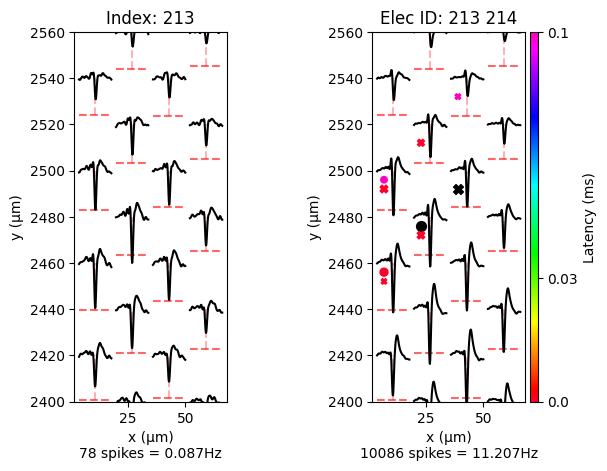

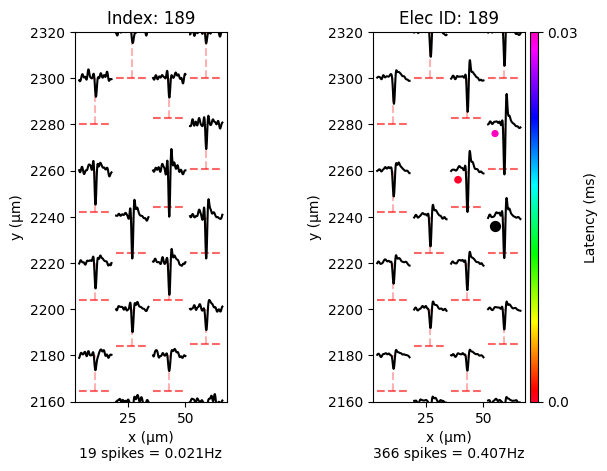

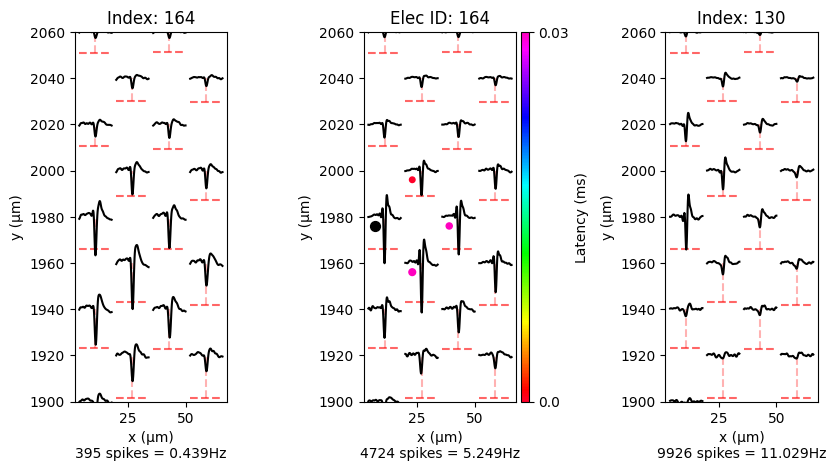

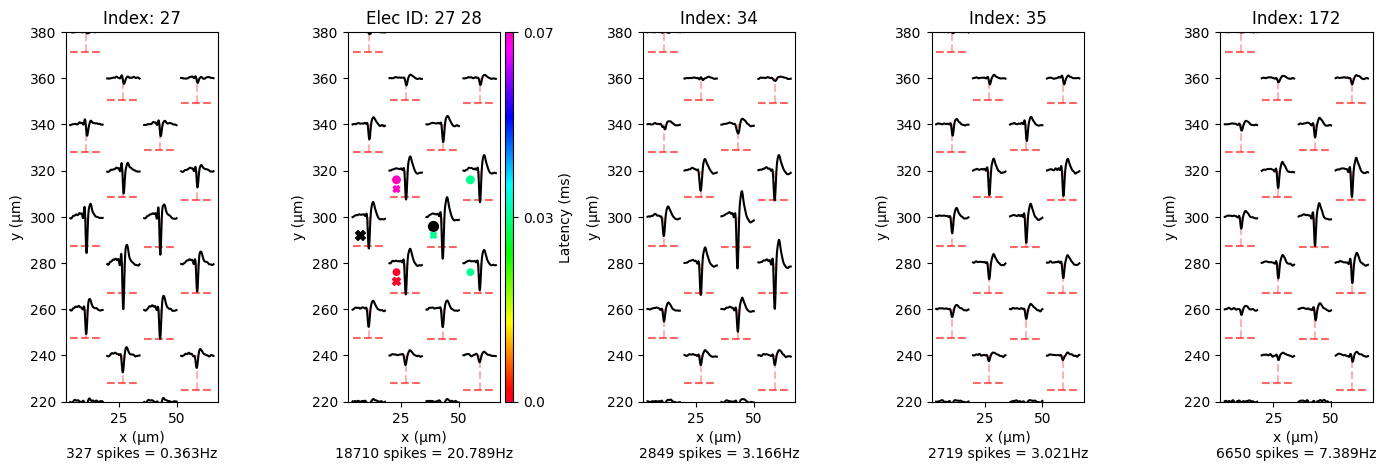

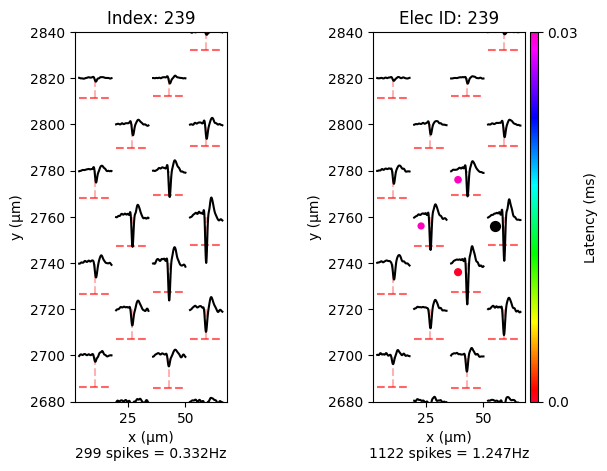

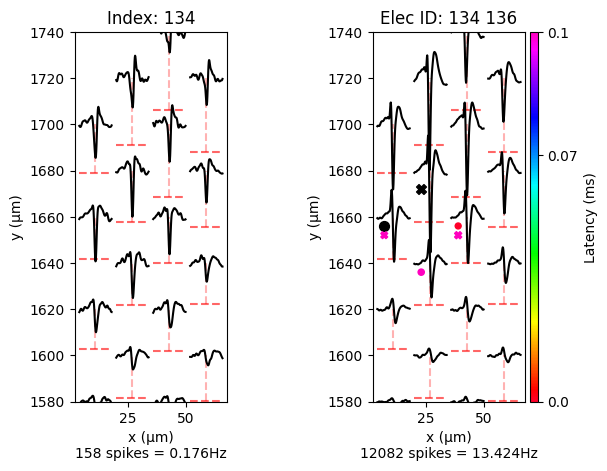

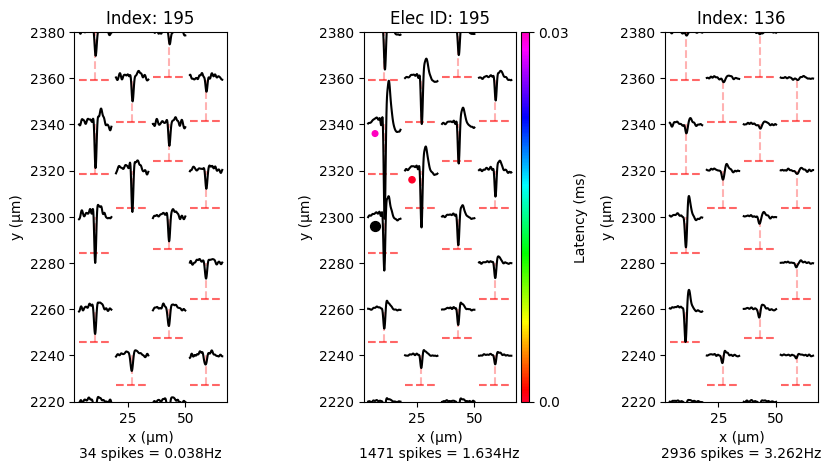

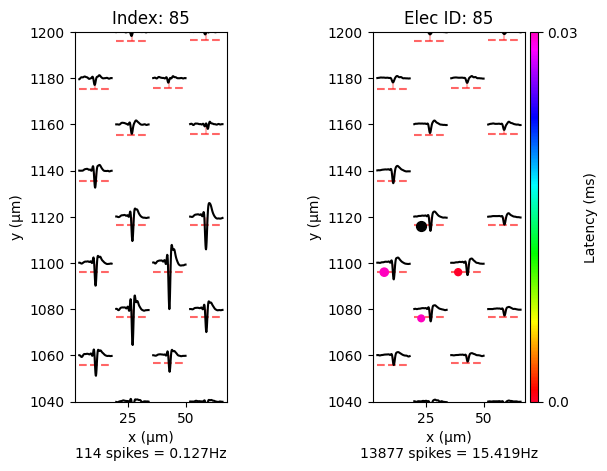

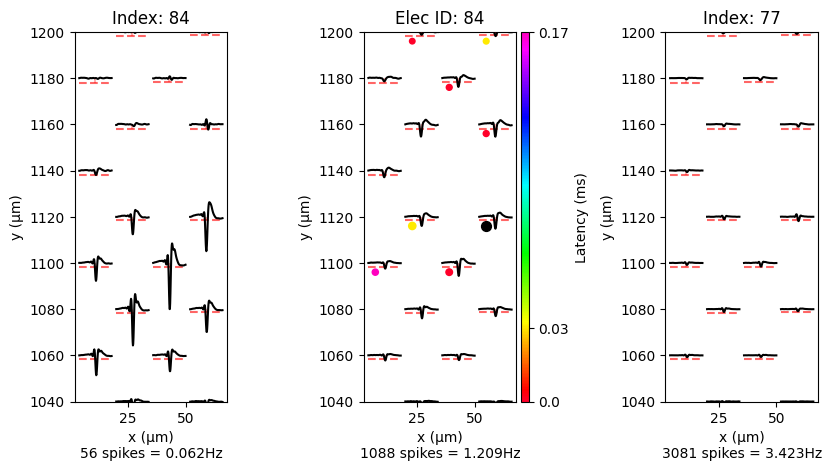

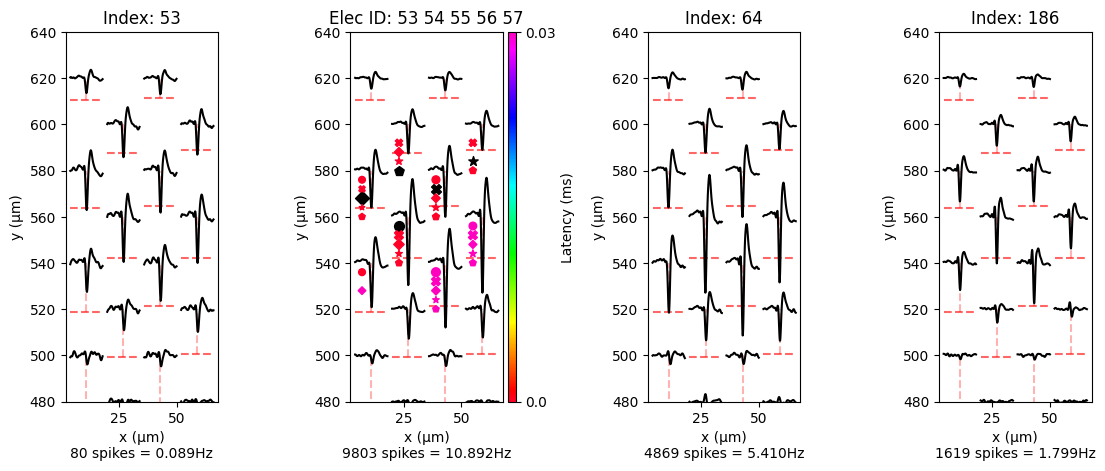

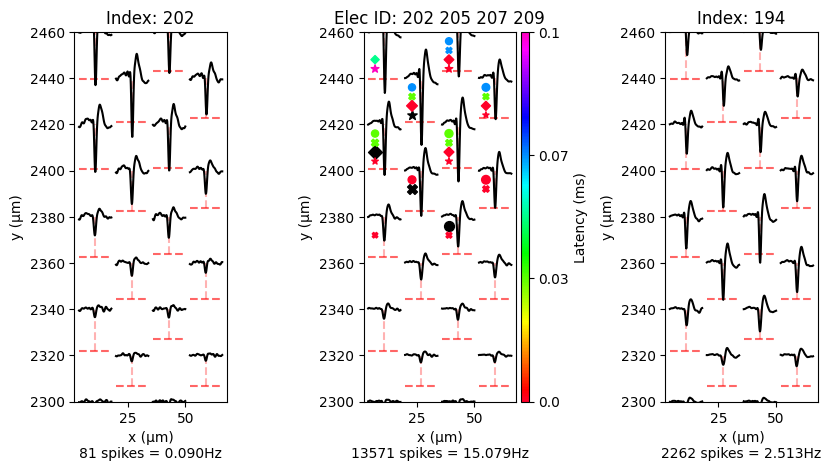

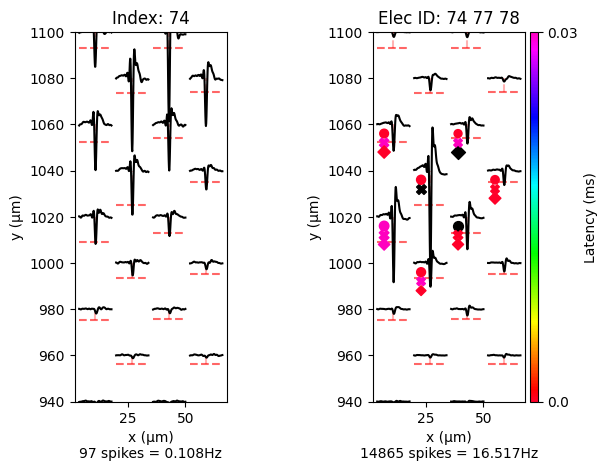

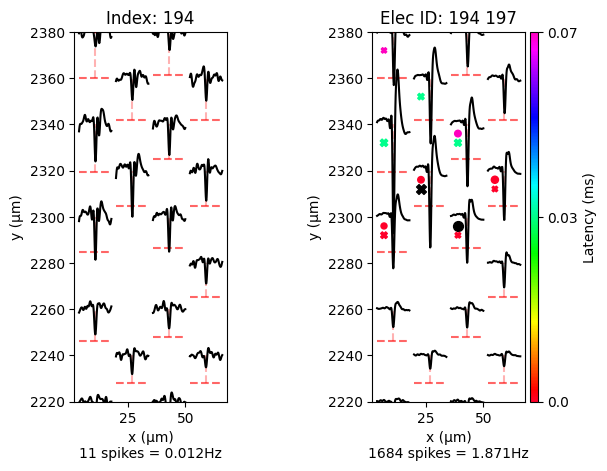

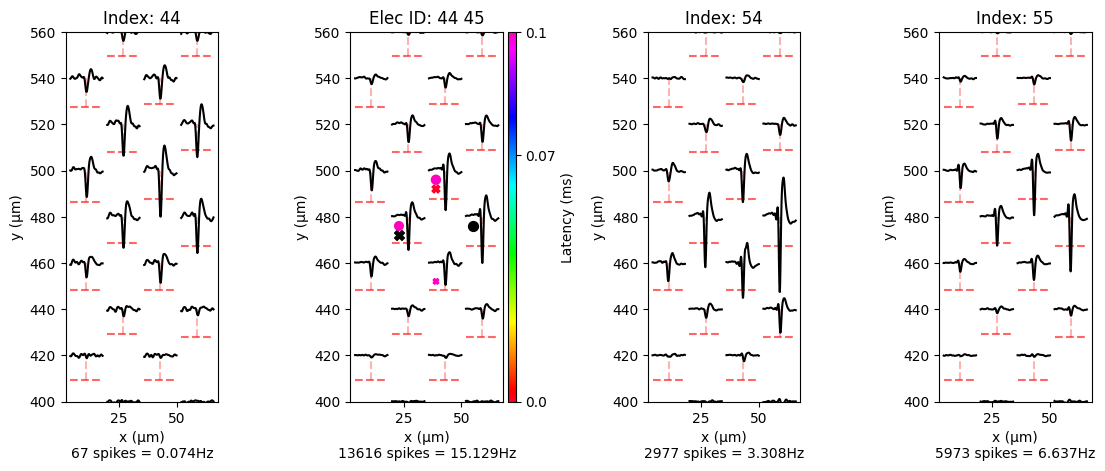

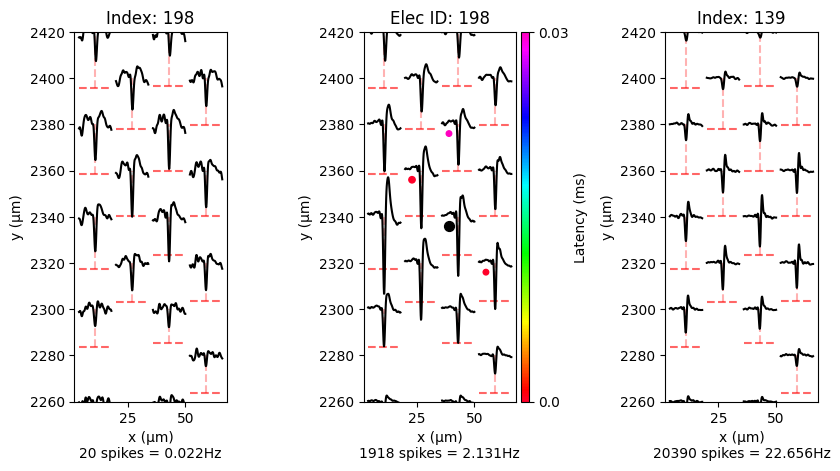

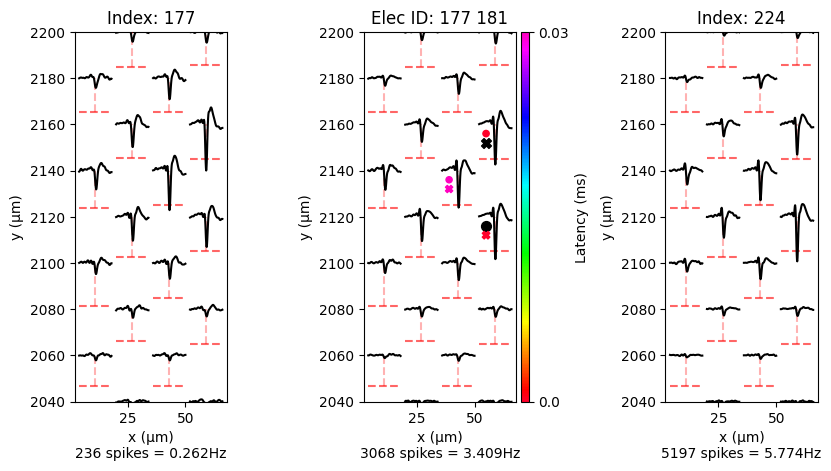

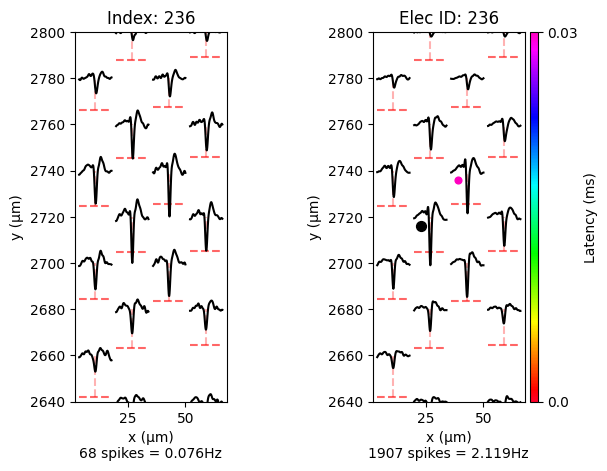

KeyboardInterrupt: 

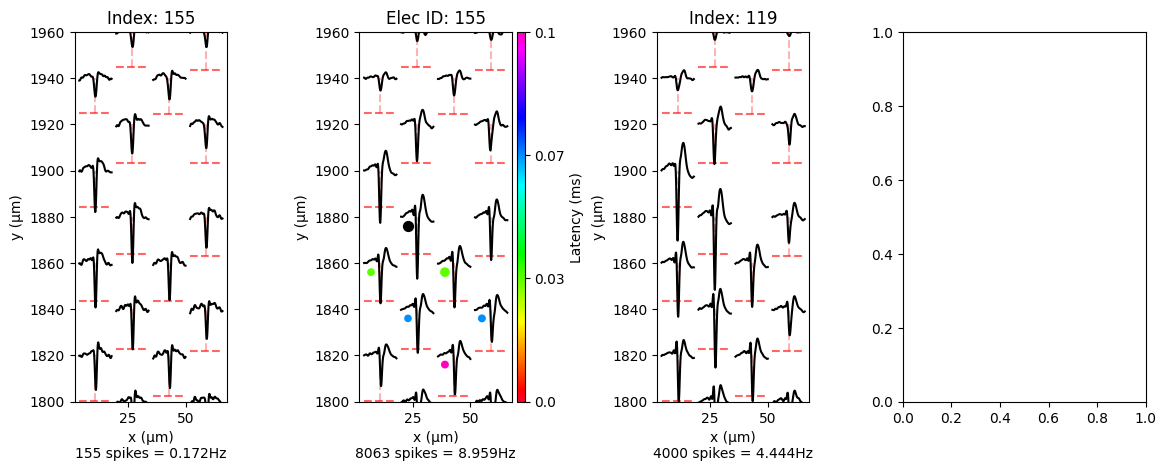

In [73]:
for elec, spike_train in prop_elec_spikes.items():   
    elec_unit = Unit(elec, spike_train, elec, RECORDING)
    
    num_cols = 2
    prop = elec_to_prop[elec].copy()
    prop.spike_train = np.setdiff1d(prop.spike_train, elec_unit.spike_train)

    if elec in elec_to_ks:
        kses = elec_to_ks[elec]
        num_cols += len(kses)  

    fig, axes = plt.subplots(1, num_cols, figsize=(3.6*num_cols, 4.8))    
    axes[0].set_title(f"{len(spike_train)} spikes")
    plot_kwargs = elec_unit.plot(axis=axes[0], chans_rms=CHANS_RMS, return_kwargs=True)
    
    um = axes[0].get_xlabel()
    axes[0].set_xlabel(f"""{um}
{len(spike_train)} spikes = {len(spike_train)/RECORDING.get_total_duration():.3f}Hz""")

    prop.plot(subplot=(fig, axes[1]), **plot_kwargs)
    axes[1].set_xlabel(f"""{um}
{len(prop)} spikes = {len(prop)/RECORDING.get_total_duration():.3f}Hz""")
    
    if elec in ks_elec_spikes:
        for i, ks in enumerate(kses):
            ks.plot(axis=axes[i+2], **plot_kwargs)
            axes[i+2].set_xlabel(f"""{um}
{len(ks)} spikes = {len(ks)/RECORDING.get_total_duration():.3f}Hz""")
                        
    plt.show()

## Only kilosort

In [10]:
# for elec, spike_train in prop_elec_spikes.items():
#     if len(spike_train) == 0:
#         continue
    
#     unit = Unit(elec, spike_train, elec, RECORDING)
#     unit.plot(chans_rms=CHANS_RMS)